<a href="https://colab.research.google.com/github/ultra151/cv/blob/main/6_Functional_API_%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Model
from keras import layers

text1_max_words = 10000
text2_max_words = 10000
answer_max_words = 500

In [ ]:
text1_input = layers.Input(shape=(None,), dtype='int32', name='text1')
embedded_text1 = layers.Embedding(text1_max_words, 64)(text1_input)
encoded_text1 = layers.LSTM(32)(embedded_text1)

In [ ]:
text2_input = layers.Input(shape=(None,), dtype='int32', name='text2')
embedded_text2 = layers.Embedding(text2_max_words, 32)(text2_input)
encoded_text2 = layers.LSTM(16)(embedded_text2)

In [ ]:
concatenated = layers.Concatenate(axis=-1)([encoded_text1, encoded_text2])

In [ ]:
import numpy as np
a = np.arange(10).reshape(2,5)
print("a", a, sep="\n")
b = np.arange(20,30).reshape(2,5)
print("b", b, sep="\n")

a
[[0 1 2 3 4]
 [5 6 7 8 9]]
b
[[20 21 22 23 24]
 [25 26 27 28 29]]


In [ ]:
import tensorflow as tf
print("axis=0", tf.keras.layers.Concatenate(axis=0)([a,b]), sep="\n")
print("axis=1", tf.keras.layers.Concatenate(axis=1)([a,b]), sep="\n")
print("axis=-1", tf.keras.layers.Concatenate(axis=-1)([a,b]), sep="\n")

axis=0
tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(4, 5), dtype=int64)
axis=1
tf.Tensor(
[[ 0  1  2  3  4 20 21 22 23 24]
 [ 5  6  7  8  9 25 26 27 28 29]], shape=(2, 10), dtype=int64)
axis=-1
tf.Tensor(
[[ 0  1  2  3  4 20 21 22 23 24]
 [ 5  6  7  8  9 25 26 27 28 29]], shape=(2, 10), dtype=int64)


In [ ]:
answer = layers.Dense(answer_max_words, activation='softmax')(concatenated)

In [ ]:
model = Model(inputs=[text1_input, text2_input], outputs=answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text1 (InputLayer)        │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text2 (InputLayer)        │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, None, 64)       │        640,000 │ text1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, None, 32)       │        320,000 │ text2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 32)             │         12,416 │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ (None, 16)             │          3,136 │ embedding_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 48)             │              0 │ lstm_2[0][0],          │
│ (Concatenate)             │                        │                │ lstm_3[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 500)            │         24,500 │ concatenate_4[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,000,052 (3.81 MB)

 Trainable params: 1,000,052 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

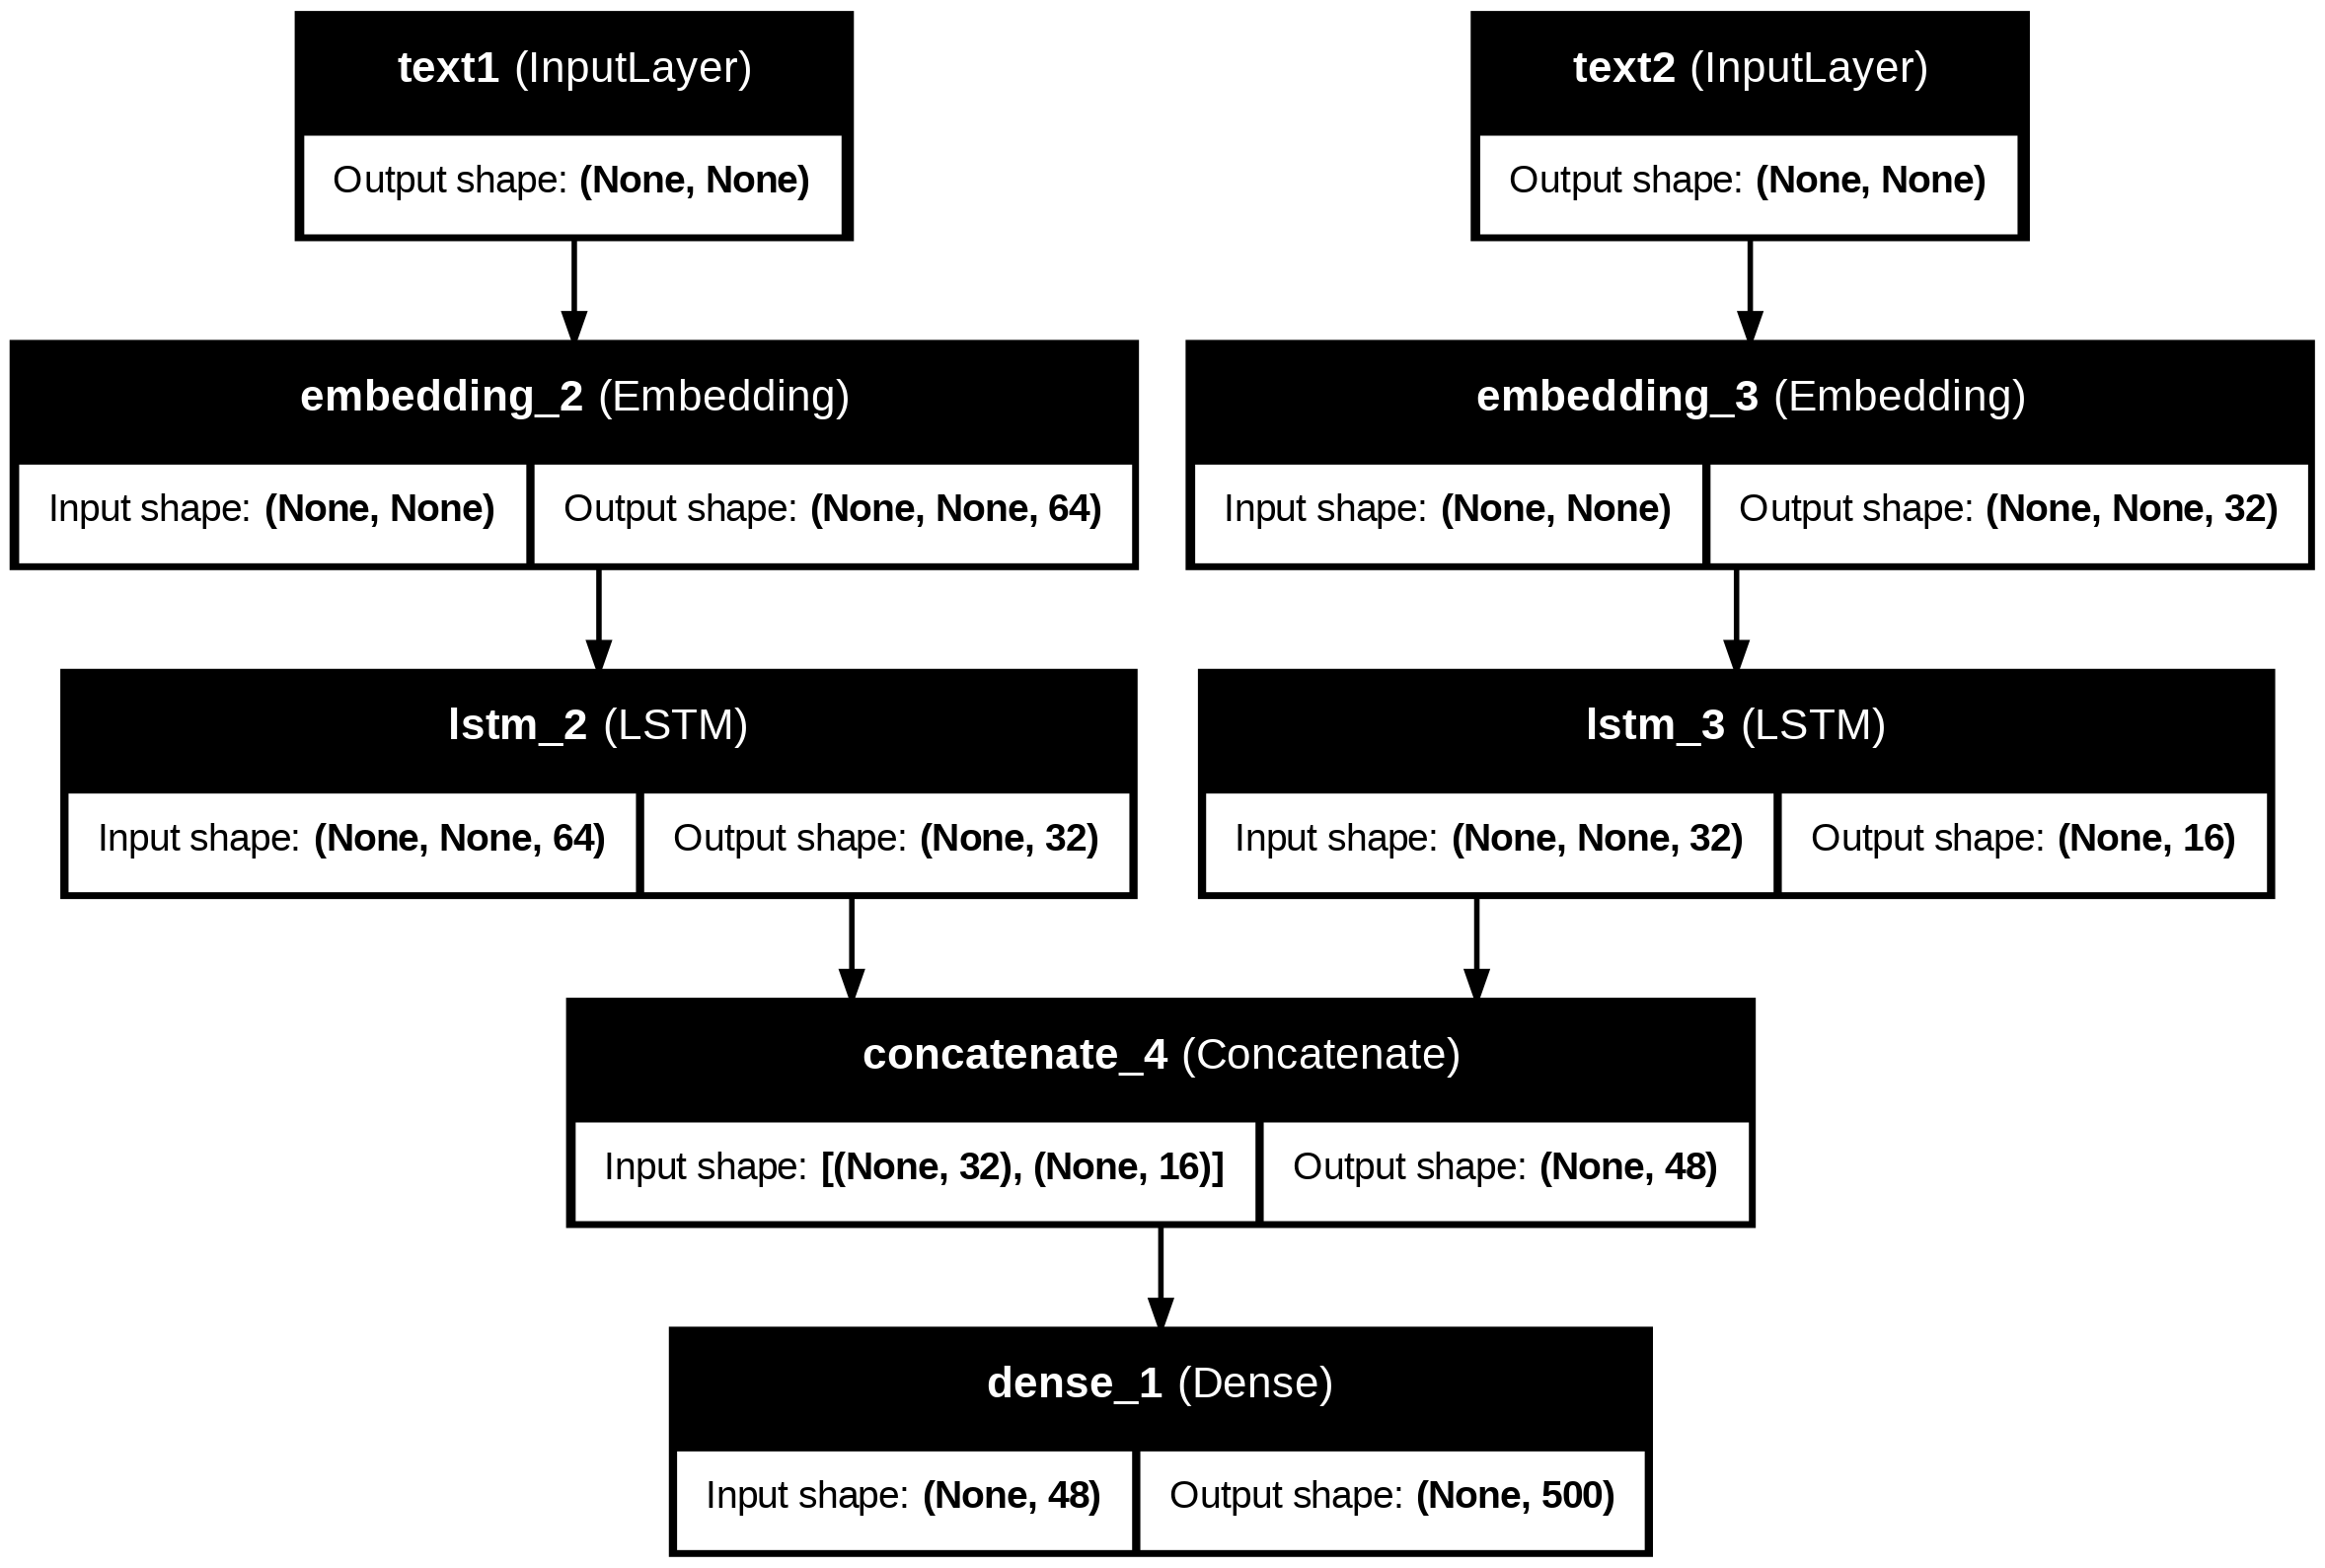

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True)

In [ ]:
import numpy as np
from keras.utils import to_categorical
num_samples = 1000
max_len = 100

In [ ]:
text1 = np.random.randint(low=0, high=text1_max_words, size=(num_samples, max_len))
text2 = np.random.randint(low=0, high=text2_max_words, size=(num_samples, max_len))

In [ ]:
answers = np.random.randint(low=0, high=answer_max_words, size=(num_samples,))
answers = to_categorical(answers)

In [ ]:
model.fit({'text1':text1, 'text2':text2}, answers, epochs=3, batch_size=128)

Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 52s 222ms/step - acc: 0.0016 - loss: 6.2149
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - acc: 0.0084 - loss: 6.2099
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - acc: 0.0054 - loss: 6.2065


In [ ]:
prediction = model.predict({'text1':text1, 'text2':text2})
label = np.argmax(prediction[0])
print(label)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step
319


In [ ]:
len(prediction[0])

500

In [ ]:
np.argmax(prediction[0])

319

In [ ]:
from keras import layers
from keras import Input
from keras.models import Model

In [ ]:
max_words = 10000
num_income_groups = 10

In [ ]:
posts_input = Input(shape=(None,), dtype='int32', name='posts')


In [ ]:
x = layers.Embedding(max_words, 256)(posts_input)
x = layers.Conv1D(filters=128, kernel_size=5, activation='relu')(x)
x = layers.MaxPooling1D(pool_size=5)(x)
x = layers.Conv1D(filters=256, kernel_size=5, activation='relu')(x)
x = layers.Conv1D(filters=256, kernel_size=5, activation='relu')(x)
x = layers.MaxPooling1D(pool_size=5)(x)
x = layers.Conv1D(filters=256, kernel_size=2, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x)

In [ ]:
pred_age = layers.Dense(1, name='age')(x)
pred_income = layers.Dense(num_income_groups, activation='softmax', name='income')(x)
pred_gender = layers.Dense(1, activation='sigmoid', name='gender')(x)

In [ ]:
model = Model(posts_input, [pred_age, pred_income, pred_gender])

In [ ]:
model.compile(optimizer='rmsprop', loss={'age':'mse', 'income':'sparse_categorical_crossentropy',
                                         'gender':'binary_crossentropy'}, metrics={'age':'mse', 'income':'acc', 'gender':'acc'})

In [ ]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ posts (InputLayer)        │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, None, 256)      │      2,560,000 │ posts[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, None, 128)      │        163,968 │ embedding_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, None, 128)      │              0 │ conv1d[0][0]           │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, None, 256)      │        164,096 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, None, 256)      │        327,936 │ conv1d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, None, 256)      │              0 │ conv1d_2[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, None, 256)      │        131,328 │ max_pooling1d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d      │ (None, 256)            │              0 │ conv1d_3[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │         32,896 │ global_max_pooling1d[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ age (Dense)               │ (None, 1)              │            129 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ income (Dense)            │ (None, 10)             │          1,290 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gender (Dense)            │ (None, 1)              │            129 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,381,772 (12.90 MB)

 Trainable params: 3,381,772 (12.90 MB)

 Non-trainable params: 0 (0.00 B)

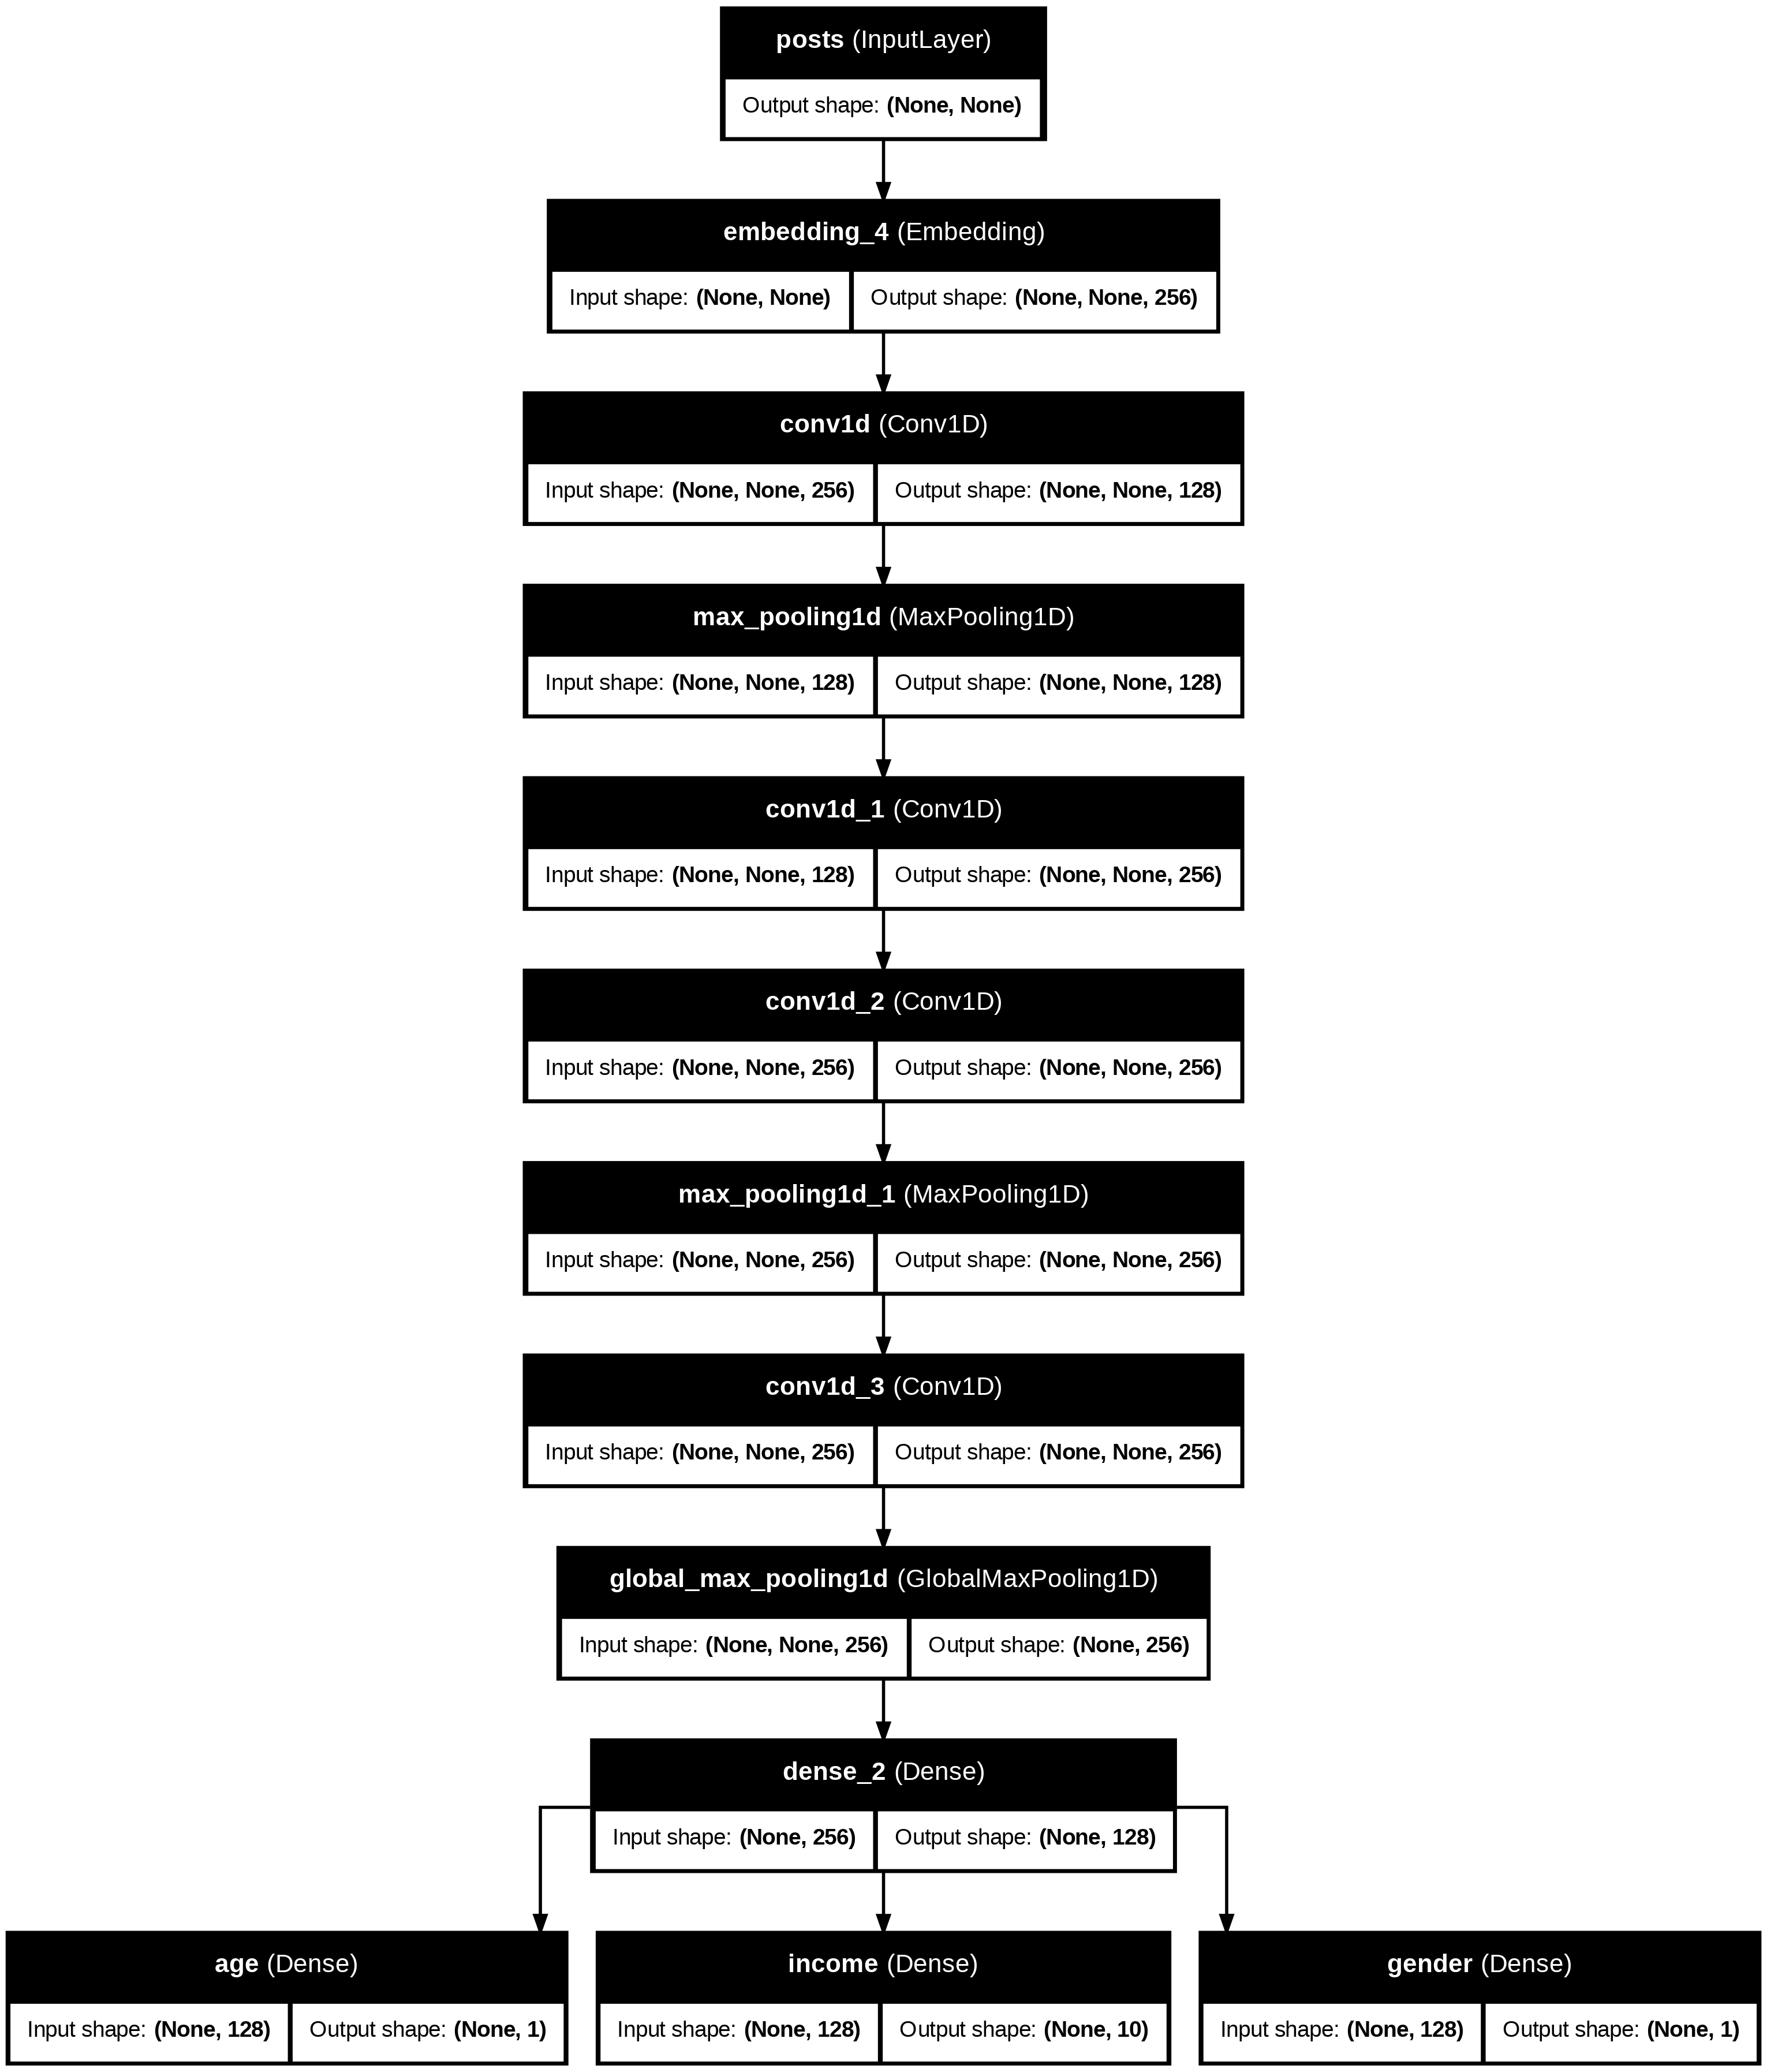

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True)

In [ ]:
import numpy as np
num_samples = 1000
max_len = 100

posts = np.random.randint(low=0, high=max_words, size=(num_samples, max_len))

target_age = np.random.randint(low=0, high=100, size=num_samples)
target_income = np.random.randint(low=0, high=10, size=num_samples)
target_gender = np.random.randint(low=0, high=2, size=num_samples)

In [ ]:
history = model.fit(posts, {'age':target_age, 'income':target_income, 'gender':target_gender},
                    epochs=3, batch_size=64)

history.history

Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 284ms/step - age_mse: 1264.3671 - gender_acc: 0.4974 - income_acc: 0.0986 - loss: 1267.9772
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 392ms/step - age_mse: 426.5049 - gender_acc: 0.5282 - income_acc: 0.1001 - loss: 429.5614
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 441ms/step - age_mse: 282.1721 - gender_acc: 0.5372 - income_acc: 0.1046 - loss: 285.2412


{'age_mse': [1060.179443359375, 413.6575927734375, 209.29263305664062],
 'gender_acc': [0.5149999856948853, 0.527999997138977, 0.5070000290870667],
 'income_acc': [0.09300000220537186, 0.09600000083446503, 0.09700000286102295],
 'loss': [1063.4991455078125, 416.7351379394531, 212.37428283691406]}

In [ ]:
test_eval = model.evaluate(posts, {'age':target_age, 'income':target_income, 'gender':target_gender})
print('prediction model loss:', test_eval)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - age_mse: 580.5339 - gender_acc: 0.4927 - income_acc: 0.1033 - loss: 583.6949
prediction model loss: [601.4678344726562, 598.287109375, 0.4819999933242798, 0.10499999672174454]


In [ ]:
result = model.predict(posts)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


In [ ]:
len(result[0])

1000

In [ ]:
result[0][:5]

array([[22.817104],
       [69.88384 ],
       [88.2768  ],
       [78.384125],
       [34.044144]], dtype=float32)

In [ ]:
result[1][:5]

array([[0.10458295, 0.08746655, 0.09676068, 0.11672375, 0.0789276 ,
        0.09241957, 0.08652294, 0.09604643, 0.1358789 , 0.10467055],
       [0.14011705, 0.05095373, 0.04279422, 0.08399291, 0.05871322,
        0.10737634, 0.04124444, 0.11000956, 0.18344012, 0.18135844],
       [0.12232201, 0.05490601, 0.06805102, 0.12893051, 0.03806749,
        0.06415772, 0.05339278, 0.08591884, 0.25860327, 0.12565033],
       [0.11131532, 0.06099842, 0.08410227, 0.1505009 , 0.04081263,
        0.06100779, 0.06011321, 0.08507255, 0.23641059, 0.10966623],
       [0.08658636, 0.08934323, 0.11427642, 0.16310933, 0.06657416,
        0.07454997, 0.08806344, 0.0842148 , 0.15509932, 0.07818291]],
      dtype=float32)

In [ ]:
np.argmax(result[1][0] + 1)

8

In [ ]:
result[2][:5]

array([[0.45089498],
       [0.36403683],
       [0.36258528],
       [0.37059703],
       [0.40713143]], dtype=float32)

In [ ]:
import tensorflow as tf
from keras.datasets import mnist
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(test_images.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
y_train_odd = []
for y in train_labels:
    if y % 2 == 0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
print("y_train_odd.shape:", y_train_odd.shape)

y_train_odd.shape: (60000,)


In [ ]:
y_test_odd = []
for y in test_labels:
    if y % 2 == 0:
        y_test_odd.append(0)
    else:
        y_test_odd.append(1)

y_test_odd = np.array(y_test_odd)
print("y_test_odd.shape:", y_test_odd.shape)

y_test_odd.shape: (10000,)


In [ ]:
print("원 데이터:", train_labels[:10])
print("홀짝 데이터:", y_train_odd[:10])

원 데이터: [5 0 4 1 9 2 1 3 1 4]
홀짝 데이터: [1 0 0 1 1 0 1 1 1 0]


In [ ]:
x_train = train_images/255.0
x_test = test_images/255.0

In [ ]:
x_train_4d = tf.expand_dims(x_train, axis=-1)
x_test_4d = tf.expand_dims(x_test, -1)

print(x_train_4d.shape, x_test_4d.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
from keras.models import Model
from keras import layers
from keras import Input

inputs = Input(shape=(28,28,1), dtype='float32', name='inputs')
conv = layers.Conv2D(32, kernel_size=(3,3), activation='relu', name='conv2d')(inputs)
pool = layers.MaxPooling2D(pool_size=2, name='maxpooling2d')(conv)
flat = layers.Flatten(name='flatten')(pool)

digit_outputs = layers.Dense(10, activation='softmax', name='digit_dense')(flat)
odd_outputs = layers.Dense(1, activation='sigmoid', name='odd_dense')(flat)

model = Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

In [ ]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)       │ (None, 28, 28, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 26, 26, 32)     │            320 │ inputs[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ maxpooling2d              │ (None, 13, 13, 32)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 5408)           │              0 │ maxpooling2d[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ digit_dense (Dense)       │ (None, 10)             │         54,090 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ odd_dense (Dense)         │ (None, 1)              │          5,409 │ flatten[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 59,819 (233.67 KB)

 Trainable params: 59,819 (233.67 KB)

 Non-trainable params: 0 (0.00 B)

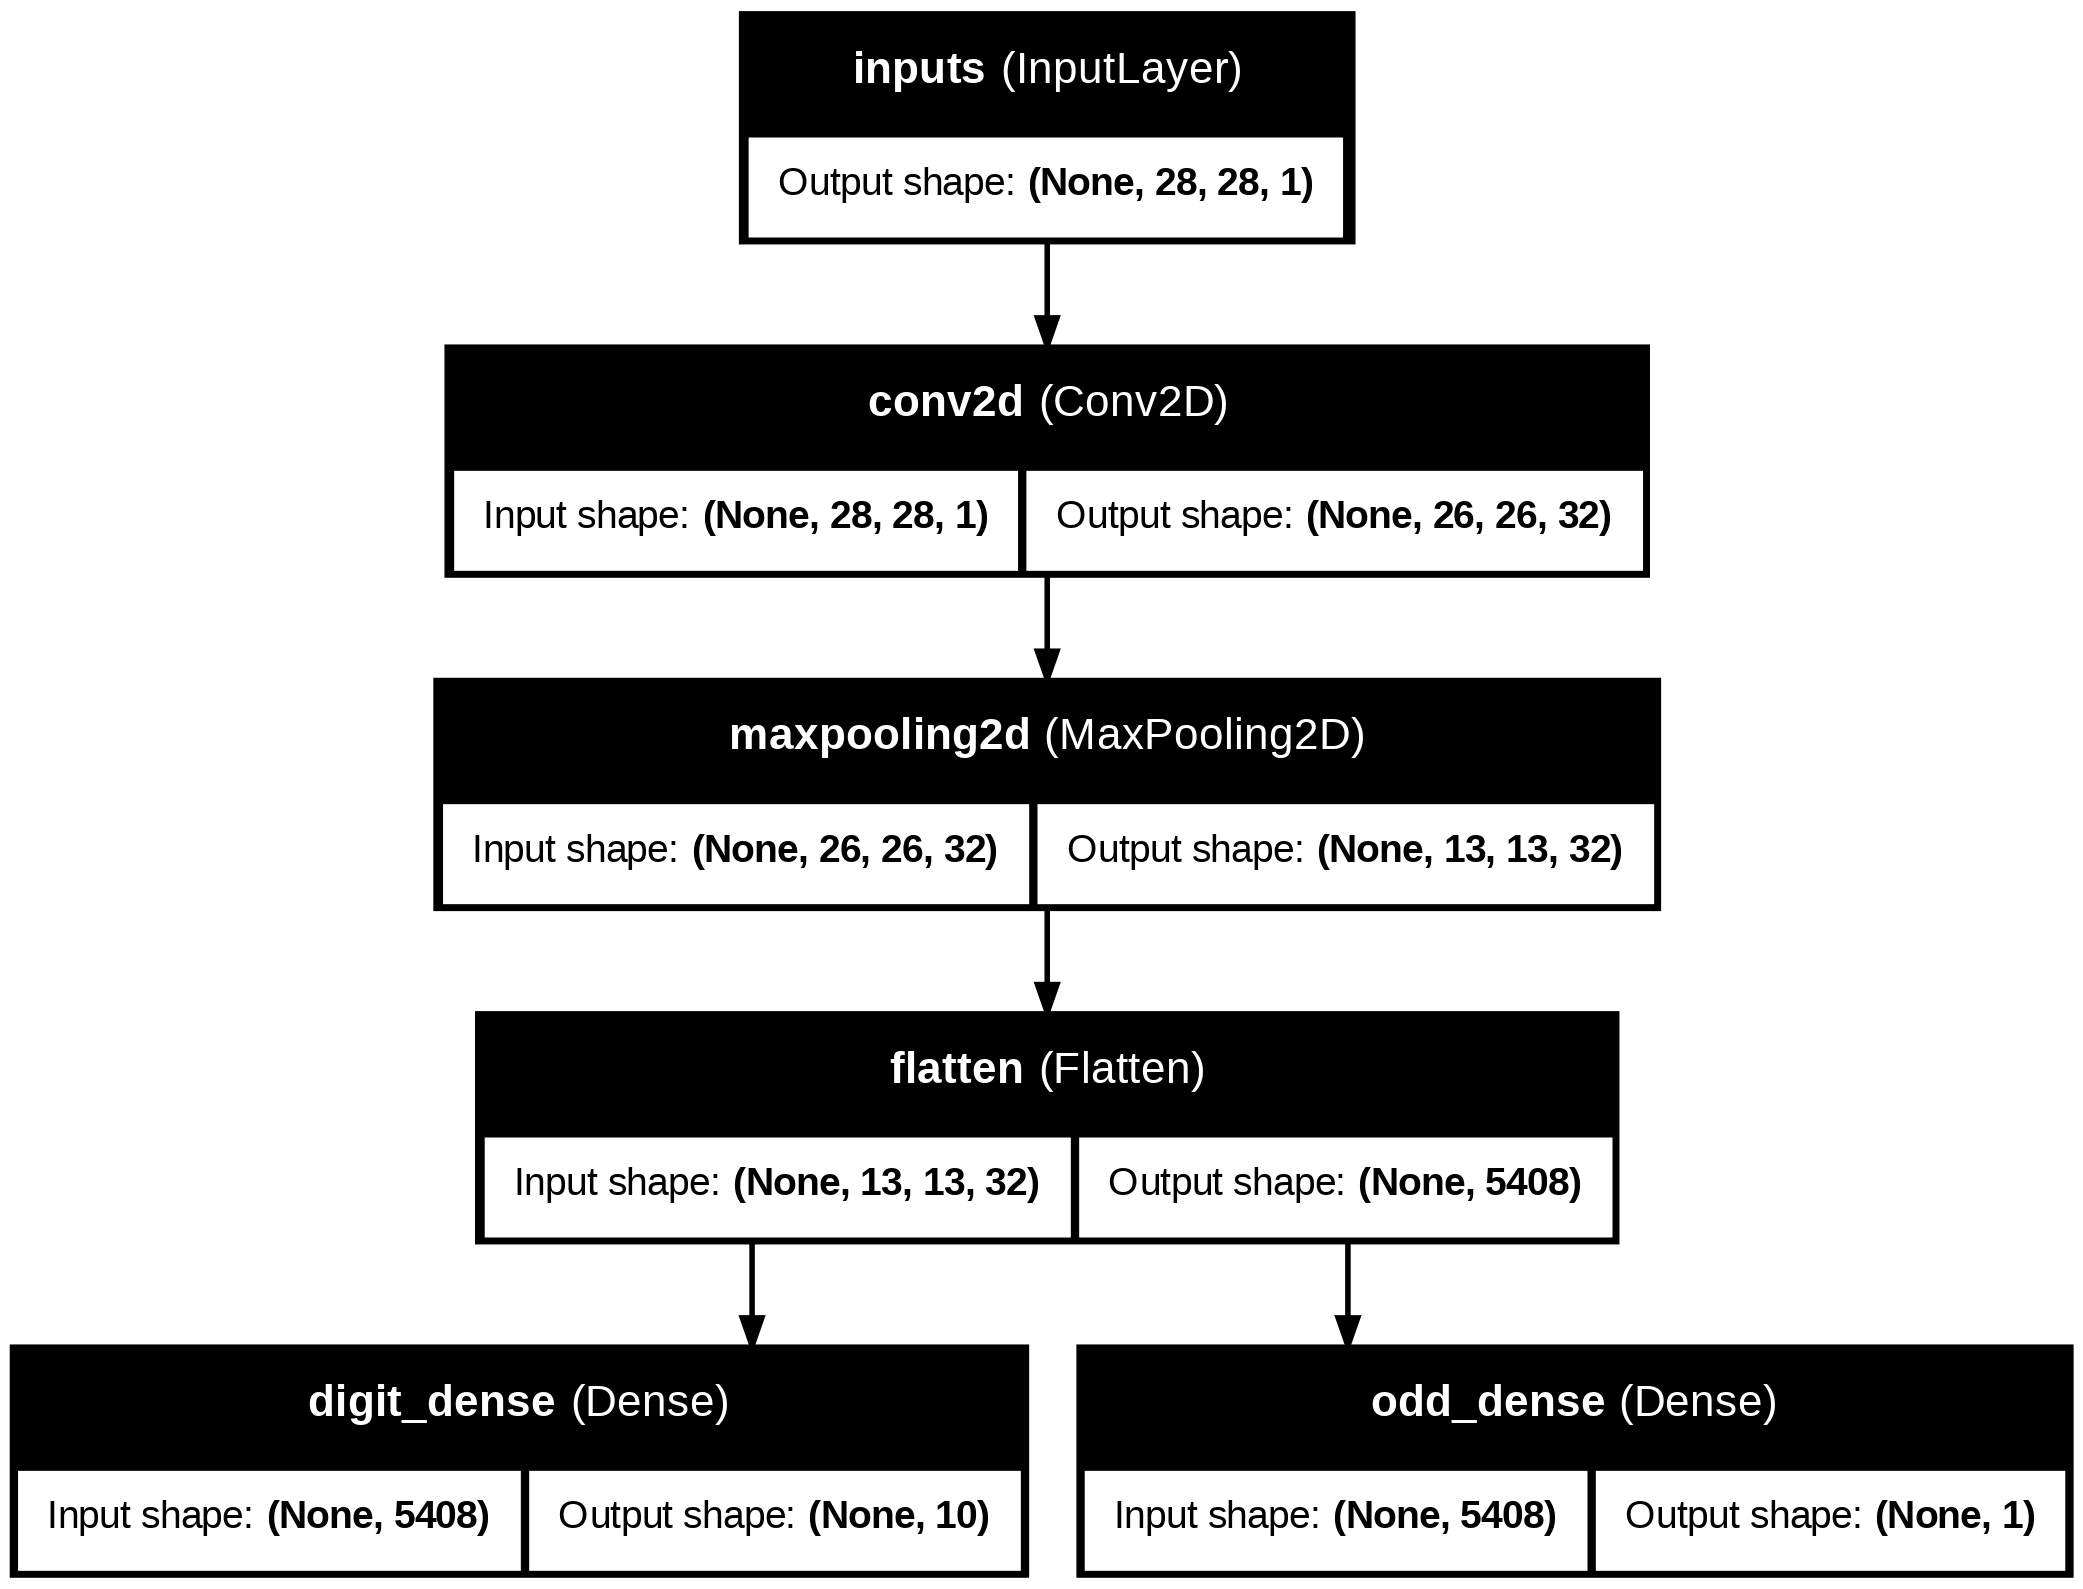

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer='adam', loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense':'binary_crossentropy'},
              metrics={'digit_dense':'acc', 'odd_dense':'acc'})

In [ ]:
history = model.fit(x_train_4d, [train_labels, y_train_odd],
                    validation_data=(x_test_4d, [test_labels, y_test_odd]), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - digit_dense_acc: 0.8561 - loss: 0.8259 - odd_dense_acc: 0.8715 - val_digit_dense_acc: 0.9676 - val_loss: 0.2380 - val_odd_dense_acc: 0.9601
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - digit_dense_acc: 0.9684 - loss: 0.2245 - odd_dense_acc: 0.9611 - val_digit_dense_acc: 0.9774 - val_loss: 0.1639 - val_odd_dense_acc: 0.9694
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - digit_dense_acc: 0.9791 - loss: 0.1683 - odd_dense_acc: 0.9683 - val_digit_dense_acc: 0.9806 - val_loss: 0.1464 - val_odd_dense_acc: 0.9718
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - digit_dense_acc: 0.9808 - loss: 0.1498 - odd_dense_acc: 0.9709 - val_digit_dense_acc: 0.9799 - val_loss: 0.1392 - val_odd_dense_acc: 0.9718
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - digit_dense_acc: 0.9855 - loss: 0.1282 - odd_dense_acc: 0.9725 - val_digit_dense_acc: 0.9833 - val_loss: 0.1317 - val_odd_dense_acc: 0.9741
Epoch 6/10
938/938 ━

In [ ]:
result = model.evaluate(x_test_4d, [test_labels, y_test_odd])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - digit_dense_acc: 0.9805 - loss: 0.1316 - odd_dense_acc: 0.9732


In [ ]:
print("validation loss:", result[0])
print("val-digit_dense_acc:", result[1])
print("val_odd_dense_acc:", result[2])

validation loss: 0.10881511121988297
val-digit_dense_acc: 0.9846000075340271
val_odd_dense_acc: 0.9793000221252441


In [ ]:
print(history.history.keys())
print('digit_dense_acc:', history.history['digit_dense_acc'])
print('loss:', history.history['loss'])
print('odd_dense_acc:', history.history['odd_dense_acc'])
print('val_digit_dense_acc:', history.history['val_digit_dense_acc'])
print('val_loss:', history.history['val_loss'])
print('val_odd_dense_acc:', history.history['val_odd_dense_acc'])

dict_keys(['digit_dense_acc', 'loss', 'odd_dense_acc', 'val_digit_dense_acc', 'val_loss', 'val_odd_dense_acc'])
digit_dense_acc: [0.9204333424568176, 0.9715666770935059, 0.9791499972343445, 0.9824166893959045, 0.9849666953086853, 0.9868000149726868, 0.9885833263397217, 0.9889500141143799, 0.9907666444778442, 0.9918333292007446]
loss: [0.49572014808654785, 0.2067447304725647, 0.16430380940437317, 0.14232800900936127, 0.1294349581003189, 0.11827456206083298, 0.10800778120756149, 0.10128767788410187, 0.0930558443069458, 0.08752717822790146]
odd_dense_acc: [0.9181333184242249, 0.9632499814033508, 0.9688166379928589, 0.9714166522026062, 0.9731166958808899, 0.9748666882514954, 0.9766333103179932, 0.9772666692733765, 0.9788833260536194, 0.9793333411216736]
val_digit_dense_acc: [0.9675999879837036, 0.977400004863739, 0.9805999994277954, 0.9799000024795532, 0.983299970626831, 0.9828000068664551, 0.9821000099182129, 0.9840999841690063, 0.9840999841690063, 0.9846000075340271]
val_loss: [0.2379777